In [1]:
import pandas as pd
import seaborn as sns

# Importing the cleaned version of our data

In [2]:
data = pd.read_csv('data/cleaned_dataset.csv')

# Feature Engineering

In [3]:
# drop useless features

#data['bound sulfur dioxide'] = data['total sulfur dioxide'] - data['free sulfur dioxide']
#data['other acid'] = data['fixed acidity'] - data['citric acid']
#data['new1'] = data['alcohol'] * data['pH']
#data['new2'] = data['alcohol'] * data['density']
#data['new3'] = data['alcohol'] * data['free sulfur dioxide']

# drop some features
#data.drop(['pH', 'citric acid', 'density', 'free sulfur dioxide'], axis=1, inplace=True)

# Spliting our dataset

In [4]:
X = data.drop(['quality', 'quality2'], axis=1).copy()
X2 = data.drop(['quality', 'quality2'], axis=1).copy()

y = data['quality'].copy()
y2 = data['quality2'].copy()

print(X.shape, y.shape, y2.shape)

(1359, 11) (1359,) (1359,)


## Scaling our data

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standard Scaler gave better results

X = StandardScaler().fit_transform(X)
X2 = StandardScaler().fit_transform(X2)

## Carrying out Smote over sampling to battle the imbalanced nature of our data

In [32]:
# SMOTE Technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)
smote2 = SMOTE(random_state=10)

X, y = smote.fit_sample(X, y)
X2, y2 = smote2.fit_sample(X2, y2)

print(X.shape, y.shape)
print(X2.shape, y2.shape)

(3462, 11) (3462,)
(2350, 11) (2350,)


## Splitting with Stratified shuffle split

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
# for dataset1 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.25, stratify=y)

# for dataset2
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=10, test_size=0.25, stratify=y2)


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

In [34]:
# importing our models and metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## We would focus on the precision score and F1 score for choosing the best model due to the business model.

### Random Forest classifier

              precision    recall  f1-score   support

           3       0.99      0.99      0.99       145
           4       0.95      0.90      0.92       154
           5       0.64      0.73      0.68       126
           6       0.59      0.63      0.61       134
           7       0.92      0.84      0.88       159
           8       1.00      0.97      0.99       148

    accuracy                           0.85       866
   macro avg       0.85      0.84      0.84       866
weighted avg       0.86      0.85      0.85       866
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Train Precision:  1.0
Test Precision:  0.8485312899106002
Accuracy:  0.848729792147806
Recall:  0.8427081402362769
Train F1 Score:  1.0
Test F1 Score:  0.844498323825159


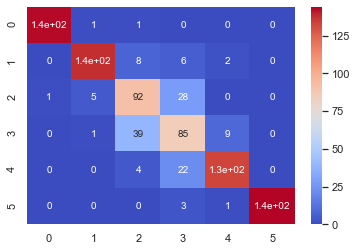

In [52]:
rf = RandomForestClassifier(n_estimators = 1000, min_samples_split= 2, random_state=10)
rf.fit(X_train, y_train)
pred3 = rf.predict(X_test)
pred3t = rf.predict(X_train)

print(classification_report(pred3, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred3, y_test), annot=True, cmap='coolwarm'), '\n')
print('Train Precision: ', precision_score(pred3t, y_train, average='macro'))
print('Test Precision: ', precision_score(pred3, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred3, y_test))
print('Recall: ', recall_score(pred3, y_test, average= 'macro'))
print('Train F1 Score: ', f1_score(pred3t, y_train, average= 'macro'))
print('Test F1 Score: ', f1_score(pred3, y_test, average= 'macro'))

In [37]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [38]:
# Checking the importance of features

pd.DataFrame([data.columns, rf.feature_importances_])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
1,0.062677,0.127637,0.078545,0.069764,0.097645,0.064901,0.089333,0.06521,0.076852,0.12163,0.145806,None,None


              precision    recall  f1-score   support

           0       0.87      0.95      0.91       268
           1       0.96      0.88      0.92       320

    accuracy                           0.91       588
   macro avg       0.91      0.91      0.91       588
weighted avg       0.92      0.91      0.91       588
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Train Precision:  1.0
Test Precision:  0.95578231292517
Accuracy:  0.9115646258503401
Recall:  0.878125
Train F1 Score:  1.0
F1 Score:  0.9153094462540716


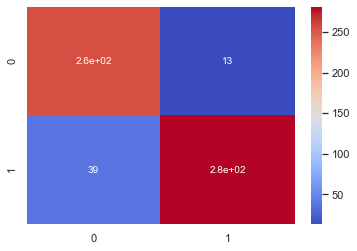

In [53]:
# Quality2

rf2 = RandomForestClassifier(n_estimators = 1000, min_samples_split= 2, random_state=10)
rf2.fit(X_train2, y_train2)
pred32 = rf2.predict(X_test2)
pred3t2 = rf2.predict(X_train2)

print(classification_report(pred32, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred32, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Train Precision: ', precision_score(pred3t2, y_train2))
print('Test Precision: ', precision_score(pred32, y_test2))
print('Accuracy: ', accuracy_score(pred32, y_test2))
print('Recall: ', recall_score(pred32, y_test2))
print('Train F1 Score: ', f1_score(pred3t2, y_train2))
print('F1 Score: ', f1_score(pred32, y_test2))

### SVC Classifier

              precision    recall  f1-score   support

           3       1.00      1.00      1.00       144
           4       0.97      0.96      0.96       146
           5       0.70      0.66      0.68       153
           6       0.60      0.66      0.63       131
           7       0.90      0.89      0.90       147
           8       1.00      0.99      1.00       145

    accuracy                           0.86       866
   macro avg       0.86      0.86      0.86       866
weighted avg       0.86      0.86      0.86       866
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8612627713920817
Accuracy:  0.8614318706697459
Recall:  0.859963881503751
F1 Score:  0.8602647674440247


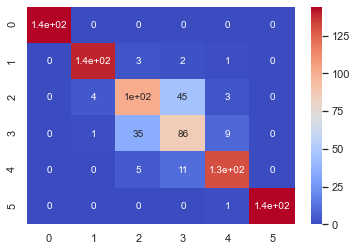

In [40]:
svc = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')
svc.fit(X_train, y_train)
pred4 = svc.predict(X_test)

print(classification_report(pred4, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred4, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred4, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred4, y_test))
print('Recall: ', recall_score(pred4, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred4, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       286
           1       0.97      0.94      0.95       302

    accuracy                           0.95       588
   macro avg       0.95      0.95      0.95       588
weighted avg       0.95      0.95      0.95       588
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.9659863945578231
Accuracy:  0.9523809523809523
Recall:  0.9403973509933775
F1 Score:  0.9530201342281879


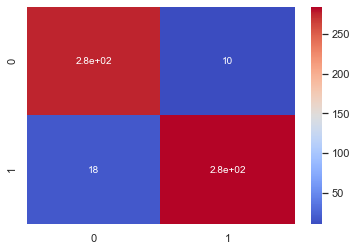

In [41]:
# Quality2

svc2 = SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf')
svc2.fit(X_train2, y_train2)
pred42 = svc2.predict(X_test2)

print(classification_report(pred42, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred42, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred42, y_test2))
print('Accuracy: ', accuracy_score(pred42, y_test2))
print('Recall: ', recall_score(pred42, y_test2))
print('F1 Score: ', f1_score(pred42, y_test2))

### SGD classifier

              precision    recall  f1-score   support

           3       0.93      0.77      0.84       175
           4       0.35      0.48      0.41       106
           5       0.62      0.48      0.55       186
           6       0.22      0.29      0.25       106
           7       0.34      0.47      0.40       107
           8       0.80      0.62      0.70       186

    accuracy                           0.54       866
   macro avg       0.54      0.52      0.52       866
weighted avg       0.61      0.54      0.57       866
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.5443326947637293
Accuracy:  0.5438799076212472
Recall:  0.5181232414392066
F1 Score:  0.5222915888485334


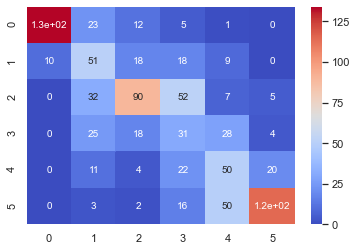

In [42]:
sgd = SGDClassifier(random_state=10)
sgd.fit(X_train, y_train)
pred5 = sgd.predict(X_test)

print(classification_report(pred5, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred5, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred5, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred5, y_test))
print('Recall: ', recall_score(pred5, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred5, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       274
           1       0.82      0.77      0.79       314

    accuracy                           0.79       588
   macro avg       0.79      0.79      0.79       588
weighted avg       0.79      0.79      0.79       588
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8197278911564626
Accuracy:  0.7857142857142857
Recall:  0.767515923566879
F1 Score:  0.792763157894737


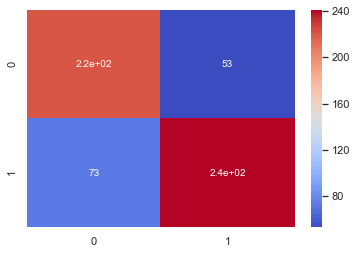

In [43]:
# Quality 2

sgd2 = SGDClassifier(random_state=10)
sgd2.fit(X_train2, y_train2)
pred52 = sgd2.predict(X_test2)

print(classification_report(pred52, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred52, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred52, y_test2))
print('Accuracy: ', accuracy_score(pred52, y_test2))
print('Recall: ', recall_score(pred52, y_test2))
print('F1 Score: ', f1_score(pred52, y_test2))

### Logistic Regresson Classifier

              precision    recall  f1-score   support

           3       0.90      0.77      0.83       167
           4       0.61      0.60      0.61       148
           5       0.57      0.60      0.58       137
           6       0.34      0.52      0.41        94
           7       0.50      0.53      0.51       136
           8       0.83      0.65      0.73       184

    accuracy                           0.62       866
   macro avg       0.62      0.61      0.61       866
weighted avg       0.66      0.62      0.64       866
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.6248722860791827
Accuracy:  0.6247113163972287
Recall:  0.6125348101085256
F1 Score:  0.6127746597000888


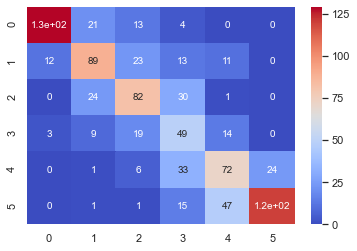

In [44]:
lg = LogisticRegression(random_state=10)
lg.fit(X_train, y_train)
pred6 = lg.predict(X_test)

print(classification_report(pred6, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred6, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred6, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred6, y_test))
print('Recall: ', recall_score(pred6, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred6, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       265
           1       0.87      0.79      0.83       323

    accuracy                           0.82       588
   macro avg       0.82      0.82      0.82       588
weighted avg       0.83      0.82      0.82       588
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.8707482993197279
Accuracy:  0.8214285714285714
Recall:  0.7925696594427245
F1 Score:  0.8298217179902756


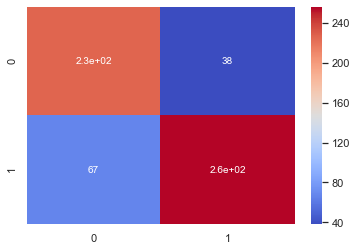

In [45]:
# Quality2

lg2 = LogisticRegression(random_state=10)
lg2.fit(X_train2, y_train2)
pred62 = lg2.predict(X_test2)

print(classification_report(pred62, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred62, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred62, y_test2))
print('Accuracy: ', accuracy_score(pred62, y_test2))
print('Recall: ', recall_score(pred62, y_test2))
print('F1 Score: ', f1_score(pred62, y_test2))

### XGBoost

              precision    recall  f1-score   support

           3       0.97      0.97      0.97       143
           4       0.86      0.78      0.82       161
           5       0.60      0.65      0.63       133
           6       0.44      0.55      0.49       117
           7       0.79      0.74      0.77       155
           8       0.98      0.90      0.94       157

    accuracy                           0.77       866
   macro avg       0.77      0.76      0.77       866
weighted avg       0.79      0.77      0.78       866
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.7747046615581099
Accuracy:  0.7748267898383372
Recall:  0.7649323381259707
F1 Score:  0.7679597704695889


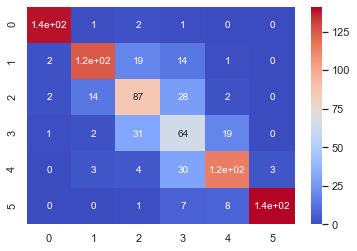

In [46]:
xgb = XGBClassifier(random_state=10)
xgb.fit(X_train, y_train)
pred7 = xgb.predict(X_test)

print(classification_report(pred7, y_test), '\n')
print(sns.heatmap(confusion_matrix(pred7, y_test), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred7, y_test, average='macro'))
print('Accuracy: ', accuracy_score(pred7, y_test))
print('Recall: ', recall_score(pred7, y_test, average= 'macro'))
print('F1 Score: ', f1_score(pred7, y_test, average= 'macro'))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       261
           1       0.94      0.85      0.89       327

    accuracy                           0.89       588
   macro avg       0.89      0.89      0.89       588
weighted avg       0.89      0.89      0.89       588
 

AxesSubplot(0.125,0.125;0.62x0.755) 

Precision:  0.9421768707482994
Accuracy:  0.8860544217687075
Recall:  0.8470948012232415
F1 Score:  0.8921095008051529


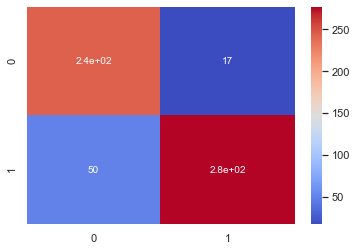

In [47]:
xgb2 = XGBClassifier(random_state=10)
xgb2.fit(X_train2, y_train2)
pred72 = xgb2.predict(X_test2)

print(classification_report(pred72, y_test2), '\n')
print(sns.heatmap(confusion_matrix(pred72, y_test2), annot=True, cmap='coolwarm'), '\n')
print('Precision: ', precision_score(pred72, y_test2))
print('Accuracy: ', accuracy_score(pred72, y_test2))
print('Recall: ', recall_score(pred72, y_test2))
print('F1 Score: ', f1_score(pred72, y_test2))

## Hyper Parameter Tuning our Best Performing model - Random Forest Classifier

In [48]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [57]:
param = {'n_estimators': [100, 200, 500, 1000], 'min_samples_split': list(range(2,6))}

model = RandomForestClassifier(random_state=10, verbose=5)

grid = RandomizedSearchCV(estimator=model, param_distributions=param, n_jobs=-1, verbose=5, cv=5, n_iter=20, scoring='precision')

In [58]:
grid.fit(X_train2, y_train2)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(random_state=10, verbose=5),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_split': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 500, 1000]},
                   scoring='precision', verbose=5)

In [59]:
# print the best parameters and score

print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 9}
0.8701516036522137


# Choosing the best Model

## Cross Validation

In [60]:
cv_score = cross_val_score(RandomForestClassifier(n_estimators=1000, random_state=10), X, y, cv=10, n_jobs=-1, scoring='precision')
cv_score2 = cross_val_score(RandomForestClassifier(n_estimators=1000, random_state=10), X2, y2, cv=10, n_jobs=-1, scoring='precision')

cv_scorex = cross_val_score(SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf'), X, y, cv=10, n_jobs=-1, scoring='precision')
cv_score2x = cross_val_score(SVC(C=1.2, class_weight=None, gamma=0.9, kernel='rbf'), X2, y2, cv=10, n_jobs=-1, scoring='precision')

print('Random Forest')
print(cv_score.mean())
print(cv_score2.mean())


print('')
print('SVC')

print(cv_scorex.mean())
print(cv_score2x.mean())

Random Forest
nan
0.8907301919803465

SVC
nan
0.9456685239303575


## Feature Selection With RFECV Model Selector

In [66]:
from sklearn.feature_selection import RFECV

est = RandomForestClassifier(n_estimators = 1000, min_samples_split= 2, random_state=10)

rcv = RFECV(estimator=est, cv=10, verbose=5, n_jobs=-1, scoring='precision')
rcv.fit(X_train2, y_train2)
predx = rcv.predict(X_test2)

print('Precision: ', precision_score(predx, y_test2))

Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Precision:  0.8231292517006803


In [74]:
pd.DataFrame([rcv.support_, data.columns, rcv.ranking_])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,False,False,False,False,False,False,False,False,False,False,True,None,None
1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
2,7,2,4,11,9,8,5,6,10,3,1,None,None


In [73]:
rcv.ranking_

array([ 7,  2,  4, 11,  9,  8,  5,  6, 10,  3,  1])

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.

# The best performing models are the SVC and Random Forest Classifier

The reason i choose Support Vector Machine - SVC Classifier was because
- Precision and F1 scores were a priority expecially for wines rated 7, 8
- From a business perspective, it was imperative that our model was accuratly able to identify good quality wine (above 7 quality)
- We therefore needed to have as low a number of False positives as possible
- Both models had the highest accuracy, f1, precision and recall scores accross board so it was obviously the best choice.

Also
- Our model was overfitting the data and generalizing poorly, the smote oversampling helped to improve the generalization on the test set
- Scaling the features helped to improve the performance of our model slightly by reducing the effect of outliers
- binning the alcohol feature helped to increase accuracy and precision slightly by one point
- feature engineering did not help to improve performance and also introduced multicolinearity
- feature selection helped us to get rid of the useless columns and multi colinearity in the dataset but slightly degraded performance by one point
- feature extration with PCA also reduced the performance of our model by one point
- Random forest has the capability to cope with noise and outliers in our dataset and it didnt need manual feature selection and extraction in this dataset
- Smote oversampling was a good contributor to performance, by counterating the imbalanced nature of our dataset it helped to increase performance on all the metrics by over 20 points

# We can improve our model by 
- Getting more effective and diverse data
- Getting a higher sample quantity

# Summary

After careful evaluation of the dataset, visual plots and machine learning models, the six most influential physiochemical features that makes red wine good fall within:

    - Alcohol Percentage     (9.2 - 14.9)
    - Volatile Acidity       (0.12 - 0.915)
    - Sulphates              (0.39 - 2.00)
    - Citric Acid            (0.0 - 1.00)
    - Total Sulfur dioxide   (6.0- 289.0)
    - Density

PH, Residual Sugars and Fixed Acidity all have a large range across board so they won't really be helpful in pinpointing whether a wine is good or not.


Free Sulphur Dioxide is a subset of total sulphur dioxide.
    